In [1]:
import sys
import time
from datetime import datetime
import pandas as pd
import geopandas as gpd
import numpy as np
import glob as glb
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import Point
import shapely.wkt
from datetimerange import DateTimeRange
import datetime as dt
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [2]:
import numpy as np

In [3]:
noaa_path = r'E:\Noaa-ar\noaa_ars_plages_n.csv'

In [4]:
#get noaa_file
def get_noaa_ar_df(file_path):
    noaa_ar = pd.read_csv(file_path)
    noaa_ar = noaa_ar.rename(columns={'Unnamed: 0': 'id'})
    noaa_ar = noaa_ar.set_index("id")
    noaa_ar['year'] = noaa_ar['year'].astype(str)
    noaa_ar['month'] = noaa_ar['month'].astype(str)
    noaa_ar['day'] = noaa_ar['day'].astype(str)
    noaa_ar['ar_time'] = pd.to_datetime(noaa_ar[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1))
    noaa_ar['Datetime_st_time'] = noaa_ar['ar_time'].apply(lambda row: row - dt.timedelta(hours = 12))
    noaa_ar['Datetime_ed_time'] = noaa_ar['ar_time'].apply(lambda row: row + dt.timedelta(hours = 12))
    noaa_ar['longitude'] = noaa_ar['central_meridian_dist']
    noaa_ar['latitude'] = noaa_ar['latitude']
    
    
    df = noaa_ar[['ar_time','noaa_ar_no','longitude','latitude','corr_whole_spot_area','mcintosh','LL','number_of_spots','greenwich','Datetime_st_time','Datetime_ed_time']]
    
    
    return df

In [5]:
noaa_df = get_noaa_ar_df(noaa_path)

In [6]:
noaa_df.head()

ar_time  noaa_ar_no  longitude  latitude  corr_whole_spot_area mcintosh  \
id                                                                              
0  2010-01-01       11039         21       -28                 130.0      Dai   
1  2010-01-02       11039         35       -27                 120.0      Dso   
2  2010-01-03       11039         46       -28                 190.0      Dso   
3  2010-01-04       11039         59       -29                 220.0      Dso   
4  2010-01-05       11039         72       -28                 150.0      Dso   

     LL  number_of_spots greenwich    Datetime_st_time    Datetime_ed_time  
id                                                                          
0   6.0              8.0      Beta 2009-12-31 12:00:00 2010-01-01 12:00:00  
1   9.0              6.0      Beta 2010-01-01 12:00:00 2010-01-02 12:00:00  
2   8.0             12.0      Beta 2010-01-02 12:00:00 2010-01-03 12:00:00  
3   7.0             10.0      Beta 2010-01-03 12:00:00 2010-01-04 12:00:00  
4   7.0              5.0      Beta 2010-01-04 12:00:00 2010-01-05 12:00:00

In [7]:
len(list(noaa_df['noaa_ar_no'].unique()))

1693

In [8]:
noaa_df[noaa_df['noaa_ar_no']==12008]

ar_time  noaa_ar_no  longitude  latitude  corr_whole_spot_area  \
id                                                                       
9204 2014-03-16       12008        -72       -11                  30.0   
9213 2014-03-17       12008        -59       -11                  40.0   
9219 2014-03-18       12008        -45       -11                  20.0   
9226 2014-03-19       12008        -31       -11                  10.0   
9235 2014-03-20       12008        -17       -11                  30.0   
9245 2014-03-21       12008         -3       -11                  50.0   
9255 2014-03-22       12008         19       -10                  50.0   
9264 2014-03-23       12008         30       -11                  30.0   
9276 2014-03-24       12008         47        -7                  30.0   
9295 2014-03-25       12008         61        -7                   NaN   
9304 2014-03-26       12008         75        -7                   NaN   
9312 2014-03-27       12008         89        -7                   NaN   

     mcintosh   LL  number_of_spots greenwich    Datetime_st_time  \
id                                                                  
9204      Hsx  2.0              1.0     Alpha 2014-03-15 12:00:00   
9213      Hax  2.0              1.0     Alpha 2014-03-16 12:00:00   
9219      Cro  2.0              2.0      Beta 2014-03-17 12:00:00   
9226      Hrx  1.0              1.0     Alpha 2014-03-18 12:00:00   
9235      Cro  4.0              6.0      Beta 2014-03-19 12:00:00   
9245      Dai  5.0             11.0      Beta 2014-03-20 12:00:00   
9255      Dai  6.0             11.0      Beta 2014-03-21 12:00:00   
9264      Dro  8.0              8.0      Beta 2014-03-22 12:00:00   
9276      Cro  7.0              6.0      Beta 2014-03-23 12:00:00   
9295     None  NaN              NaN     Plage 2014-03-24 12:00:00   
9304     None  NaN              NaN     Plage 2014-03-25 12:00:00   
9312     None  NaN              NaN     Plage 2014-03-26 12:00:00   

        Datetime_ed_time  
id                        
9204 2014-03-16 12:00:00  
9213 2014-03-17 12:00:00  
9219 2014-03-18 12:00:00  
9226 2014-03-19 12:00:00  
9235 2014-03-20 12:00:00  
9245 2014-03-21 12:00:00  
9255 2014-03-22 12:00:00  
9264 2014-03-23 12:00:00  
9276 2014-03-24 12:00:00  
9295 2014-03-25 12:00:00  
9304 2014-03-26 12:00:00  
9312 2014-03-27 12:00:00

In [9]:
from datetime import timedelta
noaa_df.loc[10296,'ar_time'] - noaa_df.loc[10290,'ar_time'] == timedelta(days=1)

True

In [10]:
a = list(noaa_df[noaa_df['noaa_ar_no']==11039]['latitude'].values)

In [11]:
res = [abs(j - i) for i, j in zip(a[: -1], a[1 :])] 

In [12]:
sum(res)/len(res)

1.0

In [13]:
list(noaa_df[noaa_df['noaa_ar_no']==11039]['latitude'].values)

[-28, -27, -28, -29, -28, -29]

### NOAA AR Latitude Daily Change

In [14]:
noaa_latitude_differ = {'NOAA_number':[],'latitude_diff':[],'lat_mean':[],'record_st':[],'record_ed':[]}

noaa_outlier_lat = []

for i,elem in enumerate(list(noaa_df['noaa_ar_no'].unique())):
    

#     print(elem)
    #successive mean differences in longitude
    
    
    tem_lat = list(noaa_df[noaa_df['noaa_ar_no']==elem]['latitude'].values)
    
    lat_mean = sum(tem_lat)/len(tem_lat)
    
    
    #noaa_time_range
    tem_time = list(noaa_df[noaa_df['noaa_ar_no']==elem]['ar_time'].values)
    
    recd_st = tem_time[0]
    recd_ed = tem_time[-1]
    
    
    
    lat_res = [j - i for i, j in zip(tem_lat[: -1], tem_lat[1 :])]
    
    time_res = [j - i for i, j in zip(tem_time[: -1], tem_time[1 :])]
    
#     print(time_res)
    
    if len(lat_res)>0:
        
        for i,lat in enumerate(lat_res):
            
#             print(type(time_res[i]))
            
            
            if time_res[i]>np.timedelta64(86400000000000,'ns'):
                
                noaa_outlier_lat.append(elem)#exclude noaa instance not daily concistance
                
            elif time_res[i]==np.timedelta64(86400000000000,'ns'):
                
                noaa_latitude_differ['NOAA_number'].append(elem)
            
                noaa_latitude_differ['latitude_diff'].append(lat)
            
                noaa_latitude_differ['lat_mean'].append(lat_mean)
            
                #noaa_record_start_time
                noaa_latitude_differ['record_st'].append(recd_st)
                #noaa_record_end_time
                noaa_latitude_differ['record_ed'].append(recd_ed)
                
                
            
            
            
#     else:
        
        
#         noaa_latitude_differ['NOAA_number'].append(elem)
        
#         noaa_latitude_differ['latitude_diff'].append(0)
        
#         noaa_latitude_differ['lat_mean'].append(lat_mean)
        
#         #noaa_record_start_time
#         noaa_latitude_differ['record_st'].append(recd_st)
#         #noaa_record_end_time
#         noaa_latitude_differ['record_ed'].append(recd_ed)
        
  

In [15]:
noaa_latitude_differ_df = pd.DataFrame(noaa_latitude_differ)

In [16]:
noaa_latitude_differ_df['NOAA_ar_life_span'] = noaa_latitude_differ_df.apply(lambda row: row['record_ed']- row['record_st'],axis=1)

In [17]:
noaa_latitude_differ_df.sort_values(by='NOAA_ar_life_span').head(100)

NOAA_number  latitude_diff   lat_mean  record_st  record_ed  \
7719         11947              0  11.000000 2014-01-07 2014-01-08   
1444         11221              0 -18.000000 2011-05-24 2011-05-25   
7050         11866              0 -16.000000 2013-10-10 2013-10-11   
11064        12328              1  -1.500000 2015-04-19 2015-04-20   
4498         11572              1  15.500000 2012-09-16 2012-09-17   
...            ...            ...        ...        ...        ...   
1029         11170              0 -25.333333 2011-03-09 2011-03-11   
1028         11170              1 -25.333333 2011-03-09 2011-03-11   
10884        12306             -1 -17.666667 2015-03-22 2015-03-24   
10885        12306              0 -17.666667 2015-03-22 2015-03-24   
5860         11725              0  10.000000 2013-04-20 2013-04-22   

      NOAA_ar_life_span  
7719             1 days  
1444             1 days  
7050             1 days  
11064            1 days  
4498             1 days  
...                 ...  
1029             2 days  
1028             2 days  
10884            2 days  
10885            2 days  
5860             2 days  

[100 rows x 6 columns]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

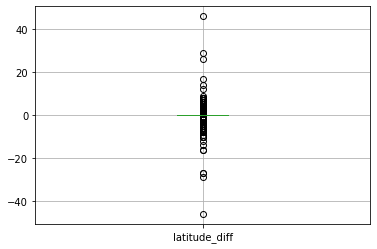

In [19]:
noaa_latitude_differ_df.boxplot(column=['latitude_diff'])

In [20]:
noaa_lat_abs = noaa_latitude_differ_df['lat_mean'].abs()
bins = [0,10, 20, 30, 50]
labels = ['0-10', '10-20', '20-30', '30+']
noaa_lat_label = pd.cut(noaa_lat_abs, bins, labels = labels,right=False,include_lowest = True)

noaa_latitude_differ_df['lat_degree_label'] = noaa_lat_label

In [21]:
noaa_latitude_differ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14334 entries, 0 to 14333
Data columns (total 7 columns):
NOAA_number          14334 non-null int64
latitude_diff        14334 non-null int64
lat_mean             14334 non-null float64
record_st            14334 non-null datetime64[ns]
record_ed            14334 non-null datetime64[ns]
NOAA_ar_life_span    14334 non-null timedelta64[ns]
lat_degree_label     14334 non-null category
dtypes: category(1), datetime64[ns](2), float64(1), int64(2), timedelta64[ns](1)
memory usage: 686.2 KB


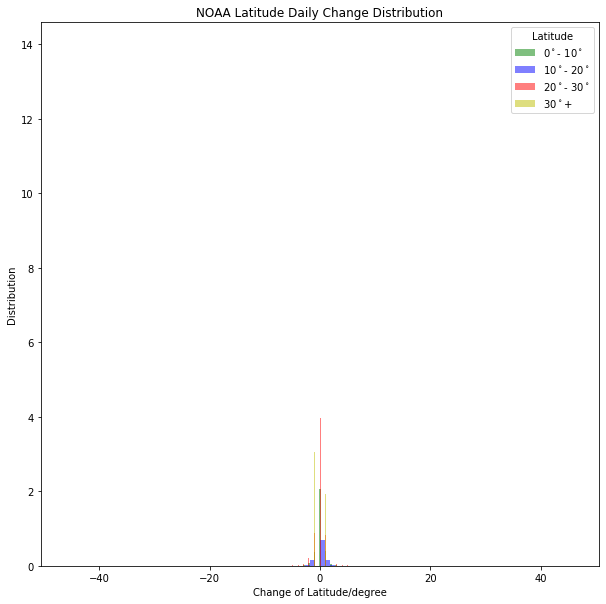

In [22]:
x1 = noaa_latitude_differ_df.loc[noaa_latitude_differ_df['lat_degree_label']=='0-10', 'latitude_diff']
x2 = noaa_latitude_differ_df.loc[noaa_latitude_differ_df['lat_degree_label']=='10-20', 'latitude_diff']
x3 = noaa_latitude_differ_df.loc[noaa_latitude_differ_df['lat_degree_label']=='20-30', 'latitude_diff']
x4= noaa_latitude_differ_df.loc[noaa_latitude_differ_df['lat_degree_label']=='30+', 'latitude_diff']
# x5 = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']=='40-50', 'longitude_diff']



kwargs = dict(alpha=0.5, bins=100,stacked=True,density=True)

plt.figure(figsize=(10,10))

plt.hist(x1, **kwargs, color='g', label='0$^\circ$- 10$^\circ$')
plt.hist(x2, **kwargs, color='b', label='10$^\circ$- 20$^\circ$')
plt.hist(x3, **kwargs, color='r', label='20$^\circ$- 30$^\circ$')
plt.hist(x4, **kwargs, color='y', label='30$^\circ$+')
# plt.hist(x5, **kwargs, color='pink', label='40$^\circ$- 50$^\circ$')

plt.gca().set(title='NOAA Latitude Daily Change Distribution', ylabel='Distribution',xlabel='Change of Latitude/degree')
# plt.xlim(-10,25)
# plt.ylim(0,1)
plt.legend(title = 'Latitude');
# plt.savefig('NOAA_longitude_change.png', dpi=1200)

(3612,)
(8179,)
(2366,)
(177,)


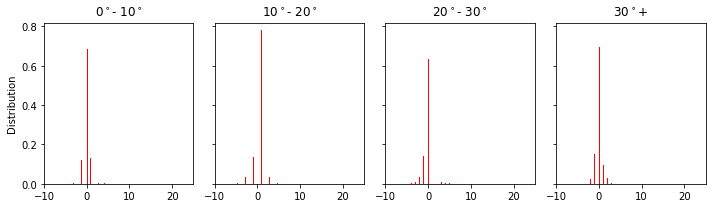

In [23]:
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True)
colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:olive']
x_labels = ['0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+']

for i, (ax, cut) in enumerate(zip(axes.flatten(), labels)):
    
    x = noaa_latitude_differ_df.loc[noaa_latitude_differ_df['lat_degree_label']==labels[i], 'latitude_diff']
    
    print(x.shape)
#     pmf, bins = np.histogram(x,bins =[-10,0,10,20])
    
#     pro = [round(elem/len(x.values),2) for i,elem in enumerate(pmf)]
    
#     print(pro)
#     sns.barplot(x = bins[:-1],y = pro,ax=ax)
#     a = np.column_stack((bins[:-1], pmf))
#     print(a)
# np.histogram(np.arange(4), bins=np.arange(5), density=True)
#     print(pmf,bins)
#     print(max(x.values))
    
#     b = int(round(len(x.values)/(max(x.values)-min(x.values)),0))

#     print(b)
#     sns.distplot(x.values,ax = ax,kde = False,norm_hist=True,fit=norm)        
#     ax.hist(x, alpha=0.5, bins=bins[:-1], weights=counts,density = True,stacked=True,label=str(cut), color=colors[i])
#     ax.plot(x,)
    if i==0:
        ax.set_ylabel('Distribution')
    
    ax.set_title(x_labels[i],)
    
    
    num_bins = 50
    counts,bins = np.histogram(x,bins = num_bins)
    bins =  bins[:-1] + (bins[1] - bins[0])/2
    probs = counts/float(counts.sum())
    
    ax.bar(bins, probs, 10/num_bins,color='red')

# plt.suptitle('Distribution Histogram of Latitude Change', y=1.05, size=10)
# plt.suptitle('Change of Latitude', y=1.05, size=8,va='bottom')
# plt.xlabel('Change of Latitude /Degree')
# plt.ylabel('Distribution')
ax.set_xlim(-10, 25)
# ax.set_ylim(0,0.5)
# ax.set_ylim(0, 1)
plt.tight_layout()
# fig.suptitle('Distribution Histogram of Latitude Change', y=1.05,fontsize=16)
# plt.title('Distribution Histogram of Latitude Change', y=1.05, size=10)
# plt.savefig('NOAA_Latitude_distribution.pdf', dpi=1200)

(3612,)
(8179,)
(2366,)
(177,)


Text(0.5, 1.05, '      ')

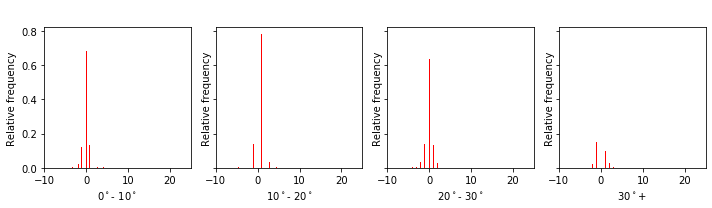

In [24]:
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True,tight_layout=True)
colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:olive']
x_labels = ['0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+']


for i in range(4):
    
    ax = axes[i]
    
    x = noaa_latitude_differ_df.loc[noaa_latitude_differ_df['lat_degree_label']==labels[i], 'latitude_diff']
    
    print(x.shape)
    
    ax.set_ylabel('Relative frequency')
    
    ax.set_xlabel(x_labels[i])
    
    
    num_bins = 50
    counts,bins = np.histogram(x,bins = num_bins)
    bins =  bins[:-1] + (bins[1] - bins[0])/2
    probs = counts/float(counts.sum())
    
    ax.bar(bins, probs, 10/num_bins,color='red')
    
    ax.set_xlim(-10, 25)


# plt.suptitle('Distribution Histogram of Latitude Change', y=1.05, size=10)
# plt.suptitle('Change of Latitude', y=1.05, size=8,va='bottom')
# plt.xlabel('Change of Latitude /Degree')
# plt.ylabel('Distribution')
# ax.set_xlim(-10, 25)
# ax.set_ylim(0,0.5)
# ax.set_ylim(0, 1)
# plt.tight_layout()
# fig.suptitle('Distribution Histogram of Latitude Change', y=1.05,fontsize=16)
# plt.suptitle('Distribution Histogram of Longitute Change', y=1.05, size=16)
plt.title('      ', y=1.05, size=10)
# plt.savefig('NOAA_Latitude_distribution_frequency_UP.pdf', dpi=1200,bbox_inches='tight')

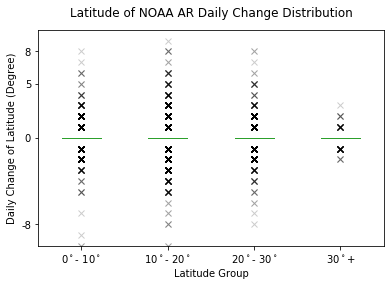

In [91]:
green_diamond = dict(markerfacecolor='b', marker='x',alpha = 0.2)
# sns.catplot(x="lat_degree_label", y="longitude_diff", kind="box", data=noaa_longitude_differ_df)


noaa_latitude_differ_df.boxplot(column=['latitude_diff'],by='lat_degree_label',flierprops = green_diamond,grid = False,figsize=(6,4) )
plt.ylim(-10,10)
y_positions = (-8,0,5,8)
y_labels = ('-8','0','5','8')
plt.yticks(y_positions, y_labels)

x_positions = (1,2,3,4)
x_labels = ('0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+')
plt.xticks(x_positions,x_labels)

# plt.title('Longitude of NOAA AR Daily Change Distribution')
plt.xlabel('Latitude Group',fontsize=10)
plt.ylabel('Daily Change of Latitude (Degree)',fontsize=10)
plt.title('')
plt.suptitle(' ')
plt.suptitle('Latitude of NOAA AR Daily Change Distribution')
plt.savefig('NOAA_Latitude_change_box_bigger_B.pdf', dpi=1200,bbox_inches='tight')

something

In [244]:
# noaa_latitude_differ_df_forpaper = pd.DataFrame(list(noaa_latitude_differ_df.values),columns = noaa_latitude_differ_df.columns)

In [245]:
# noaa_latitude_differ_df_forpaper['latitude_diff'] = noaa_latitude_differ_df_forpaper['latitude_diff'].apply(lambda row: row if abs(row)<8 else(8 if row>=8 else -8))

In [26]:
# green_diamond = dict(markerfacecolor='b', marker='x',alpha = 0.2)
# # sns.catplot(x="lat_degree_label", y="longitude_diff", kind="box", data=noaa_longitude_differ_df)


# noaa_latitude_differ_df_forpaper.boxplot(column=['latitude_diff'],by='lat_degree_label',flierprops = green_diamond,grid = False,figsize=(8,6) )
# plt.ylim(-10,10)
# y_positions = (-8,0,5,8)
# y_labels = ('<=-8','0','5','>=8')
# plt.yticks(y_positions, y_labels)

# x_positions = (1,2,3,4)
# x_labels = ('0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+')
# plt.xticks(x_positions,x_labels)

# # plt.title('Longitude of NOAA AR Daily Change Distribution')
# plt.xlabel('Latitude Group',fontsize=10)
# plt.ylabel('Daily Change of Latitude /Degree',fontsize=10)
# plt.title('')
# plt.suptitle('Latitude of NOAA AR Daily Change Distribution')


Text(0.5, 1.0, 'NOAA Latitude Average Daily Change')

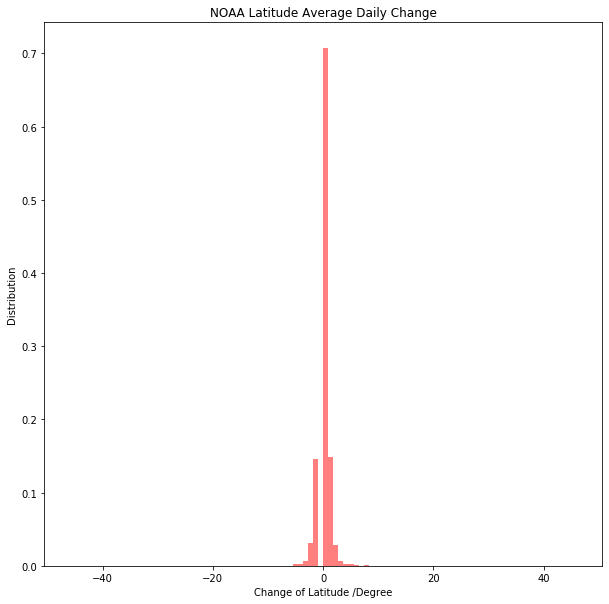

In [27]:
plt.figure(figsize=(10,10))
plt.hist(noaa_latitude_differ_df['latitude_diff'],bins=100,alpha=0.5,color='red',density=True)
plt.xlabel('Change of Latitude /Degree')
plt.ylabel('Distribution')
plt.title('NOAA Latitude Average Daily Change')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([0, 16,0,1800])
# plt.grid(True)

# plt.show()
# plt.savefig('NOAA_latitude_avg_d_change.png', dpi=1200)

In [28]:
noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']<=-8]

NOAA_number  latitude_diff   lat_mean  record_st  record_ed  \
165          11058            -46  18.714286 2010-03-26 2010-04-01   
277          11072             -8 -16.250000 2010-05-22 2010-05-29   
300          11076             -8 -20.125000 2010-06-01 2010-06-08   
2311         11321            -27 -12.545455 2011-10-16 2011-10-26   
2485         11341            -10   9.857143 2011-11-06 2011-11-19   
2731         11367             -8 -19.600000 2011-12-05 2011-12-14   
3079         11409            -10  17.090909 2012-01-22 2012-02-01   
3265         11432             -8  15.250000 2012-03-10 2012-03-21   
3760         11490            -14 -13.750000 2012-05-25 2012-06-05   
3774         11492            -27 -16.000000 2012-05-26 2012-06-07   
6762         11828            -10  10.000000 2013-08-20 2013-08-31   
7537         11923            -16  12.000000 2013-12-11 2013-12-19   
7865         11963            -12 -10.545455 2014-01-22 2014-02-01   
7960         11973            -10   6.083333 2014-02-06 2014-02-17   
9002         12094            -29 -15.666667 2014-06-17 2014-06-28   
10672        12277            -16   7.071429 2015-01-29 2015-02-11   
13099        12574             -9   5.923077 2016-08-08 2016-08-20   

      NOAA_ar_life_span lat_degree_label  
165              6 days            10-20  
277              7 days            10-20  
300              7 days            20-30  
2311            10 days            10-20  
2485            13 days             0-10  
2731             9 days            10-20  
3079            10 days            10-20  
3265            11 days            10-20  
3760            11 days            10-20  
3774            12 days            10-20  
6762            11 days            10-20  
7537             8 days            10-20  
7865            10 days            10-20  
7960            11 days             0-10  
9002            11 days            10-20  
10672           13 days             0-10  
13099           12 days             0-10

In [249]:
# noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']<=-5]

In [29]:
lat_lt_n8 = list(set(noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']<=-8]['NOAA_number'].unique()))

In [147]:
# lat_lt_n5 = list(set(noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']<=-5]['NOAA_number'].unique()))

In [30]:
noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']>=8]

NOAA_number  latitude_diff   lat_mean  record_st  record_ed  \
166          11058             46  18.714286 2010-03-26 2010-04-01   
278          11072              8 -16.250000 2010-05-22 2010-05-29   
301          11076              8 -20.125000 2010-06-01 2010-06-08   
457          11100              8 -23.833333 2010-08-17 2010-08-28   
2733         11367              8 -19.600000 2011-12-05 2011-12-14   
3080         11409              9  17.090909 2012-01-22 2012-02-01   
3264         11432              8  15.250000 2012-03-10 2012-03-21   
3761         11490             14 -13.750000 2012-05-25 2012-06-05   
3775         11492             26 -16.000000 2012-05-26 2012-06-07   
7959         11973             12   6.083333 2014-02-06 2014-02-17   
8991         12093              8  -9.181818 2014-06-17 2014-06-27   
9001         12094             29 -15.666667 2014-06-17 2014-06-28   
9821         12184              8 -18.000000 2014-10-04 2014-10-15   
10673        12277             17   7.071429 2015-01-29 2015-02-11   

      NOAA_ar_life_span lat_degree_label  
166              6 days            10-20  
278              7 days            10-20  
301              7 days            20-30  
457             11 days            20-30  
2733             9 days            10-20  
3080            10 days            10-20  
3264            11 days            10-20  
3761            11 days            10-20  
3775            12 days            10-20  
7959            11 days             0-10  
8991            10 days             0-10  
9001            11 days            10-20  
9821            11 days            10-20  
10673           13 days             0-10

In [252]:
# noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']>=5]

In [31]:
lat_gt_8 = list(set(noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']>=8]['NOAA_number'].unique()))

In [149]:
# lat_gt_5 = list(set(noaa_latitude_differ_df[noaa_latitude_differ_df['latitude_diff']>=5]['NOAA_number'].unique()))

In [32]:
lat_outlier_8 =list(set(lat_gt_8).union(set(lat_lt_n8)))

In [33]:
len(lat_outlier_8)

20

In [150]:
# lat_outlier_5 =list(set(lat_gt_5).union(set(lat_lt_n5)))

In [151]:
# len(lat_outlier_5)

76

In [34]:
lat_outlier_8

[11072,
 11076,
 11973,
 11341,
 11409,
 11923,
 12184,
 11100,
 12574,
 11490,
 11492,
 11367,
 11432,
 11058,
 11828,
 12277,
 11321,
 11963,
 12093,
 12094]

In [35]:
grouped_noaa_lat_lat = noaa_latitude_differ_df.groupby('lat_degree_label',as_index=False)['latitude_diff'].agg({"change_of_latitude":['min','max','mean']})
grouped_noaa_lat_lat.columns = ["_".join(x) for x in grouped_noaa_lat_lat.columns.ravel()]

C:\Users\Sumi\.conda\envs\gsuProject\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [36]:
grouped_noaa_lat_lat

lat_degree_label_  change_of_latitude_min  change_of_latitude_max  \
0              0-10                     -16                      17   
1             10-20                     -46                      46   
2             20-30                      -8                       8   
3               30+                      -2                       3   

   change_of_latitude_mean  
0                 0.014120  
1                -0.005624  
2                -0.005917  
3                -0.028249

In [37]:
noaa_latitude_differ_df.describe()

NOAA_number  latitude_diff      lat_mean       NOAA_ar_life_span
count  14334.000000   14334.000000  14334.000000                   14334
mean   11880.374494      -0.000977     -0.269259  9 days 20:48:01.205525
std      480.601231       1.258252     15.783023  4 days 08:54:19.277991
min    11039.000000     -46.000000    -37.000000         1 days 00:00:00
25%    11471.000000       0.000000    -15.071429         8 days 00:00:00
50%    11880.000000       0.000000      4.250000        11 days 00:00:00
75%    12287.000000       0.000000     13.500000        12 days 00:00:00
max    12731.000000      46.000000     41.500000       132 days 00:00:00

In [27]:
noaa_df[noaa_df['noaa_ar_no'].isin(lat_outlier)].to_csv(r'E:\diff_analyze\noaa_lat_outlier_update.csv')

In [28]:
# import seaborn as sns
# # from scipy.stats import norm

# # data = noaa_latitude_differ_df['latitude_succes_mean_diff'] # you can use a pandas series or a list if you want

# # sns.distplot(data)
# import numpy as np
# from scipy.stats import norm
# # import matplotlib.pyplot as plt


# # Generate some data for this demonstration.
# data = noaa_latitude_differ_df['latitude_succes_mean_diff']

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.density=True
# plt.hist(data, bins=25, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [29]:
# noaa_latitude_differ_st_ed = {'NOAA_number':[],'latitude_st_ed_diff':[],'record_st':[],'record_ed':[]}

# for i,elem in enumerate(list(noaa_df['noaa_ar_no'].unique())):
    

# #     print(elem)
#     #successive mean differences in latitude
#     tem_lat = list(noaa_df[noaa_df['noaa_ar_no']==elem]['latitude'].values)
    
#     lat_res = abs(tem_lat[-1] - tem_lat[0]) #last day latitude - first dat latitude
    
# #     if len(lat_res)>0:
        
# #         lat_succ_m_diff = sum(lat_res)/len(lat_res)
    
# #     else:
        
# #         lat_succ_m_diff = 0
    
    
    
    
    
    
#     #noaa_time_range
#     tem_time = list(noaa_df[noaa_df['noaa_ar_no']==elem]['ar_time'].values)
    
#     recd_st = tem_time[0]
#     recd_ed = tem_time[-1]
    
    
    
    
#     #NOAA_NUMBER
#     noaa_latitude_differ_st_ed['NOAA_number'].append(elem)
#     #latitude_differ
#     noaa_latitude_differ_st_ed['latitude_st_ed_diff'].append(lat_res)
#     #noaa_record_start_time
#     noaa_latitude_differ_st_ed['record_st'].append(recd_st)
#     #noaa_record_end_time
#     noaa_latitude_differ_st_ed['record_ed'].append(recd_ed)
    

In [30]:
# noaa_latitude_differ_st_ed_df = pd.DataFrame(noaa_latitude_differ_st_ed)

In [31]:
# noaa_latitude_differ_st_ed_df['NOAA_ar_life_span'] = noaa_latitude_differ_st_ed_df.apply(lambda row: row['record_ed']- row['record_st'],axis=1)

In [32]:
# noaa_latitude_differ_st_ed_df.head()

In [33]:
# noaa_latitude_differ_st_ed_df.boxplot(column=['latitude_st_ed_diff'])

In [34]:
# plt.figure(figsize=(10,10))
# plt.hist(noaa_latitude_differ_st_ed_df['latitude_st_ed_diff'],bins=10,alpha=0.5,color='blue')
# plt.xlabel('Change of Latitude /Degree')
# plt.ylabel('Frequency')
# plt.title('NOAA Latitude Change in consecutive days')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# # plt.axis([0, 16,0,1800])
# # plt.grid(True)

# plt.show()
# # plt.savefig('NOAA_latitude_avg_d_change.png', dpi=1200)

### NOAA AR Longititude Daily Change

In [38]:
noaa_longitude_differ = {'NOAA_number':[],'longitude_diff':[],'lat_mean':[],'record_st':[],'record_ed':[]}

noaa_outlier = []

for i,elem in enumerate(list(noaa_df['noaa_ar_no'].unique())):
    

#     print(elem)
    #successive mean differences in longitude
    tem_lon = list(noaa_df[noaa_df['noaa_ar_no']==elem]['longitude'].values)
    
    
    tem_lat = list(noaa_df[noaa_df['noaa_ar_no']==elem]['latitude'].values)
    
    lat_mean = sum(tem_lat)/len(tem_lat)
    
    
    #noaa_time_range
    tem_time = list(noaa_df[noaa_df['noaa_ar_no']==elem]['ar_time'].values)
    
    recd_st = tem_time[0]
    recd_ed = tem_time[-1]
    
    
    
    lon_res = [j - i for i, j in zip(tem_lon[: -1], tem_lon[1 :])]
    
    time_res = [j - i for i, j in zip(tem_time[: -1], tem_time[1 :])]
    
#     print(time_res)
    
    if len(lon_res)>0:
        
        for i,lon in enumerate(lon_res):
            
#             print(type(time_res[i]))
            
            
            if time_res[i]>np.timedelta64(86400000000000,'ns'):
                
                noaa_outlier.append(elem)#exclude noaa instance not daily concistance
                
            elif time_res[i]==np.timedelta64(86400000000000,'ns'):
                
                noaa_longitude_differ['NOAA_number'].append(elem)
            
                noaa_longitude_differ['longitude_diff'].append(lon)
            
                noaa_longitude_differ['lat_mean'].append(lat_mean)
            
                #noaa_record_start_time
                noaa_longitude_differ['record_st'].append(recd_st)
                #noaa_record_end_time
                noaa_longitude_differ['record_ed'].append(recd_ed)
                
                
            
#exclude NOAA last one day            
            
#     else:
        
        
#         noaa_longitude_differ['NOAA_number'].append(elem)
        
#         noaa_longitude_differ['longitude_diff'].append(0)
        
#         noaa_longitude_differ['lat_mean'].append(lat_mean)
        
#         #noaa_record_start_time
#         noaa_longitude_differ['record_st'].append(recd_st)
#         #noaa_record_end_time
#         noaa_longitude_differ['record_ed'].append(recd_ed)
        
  

In [39]:
noaa_outlier

[11097,
 11098,
 11118,
 11160,
 11163,
 11386,
 11388,
 11389,
 11390,
 12113,
 12161,
 12562,
 12563,
 12564,
 12565,
 12566,
 12567,
 12568,
 12691]

In [40]:
noaa_longitude_differ_df = pd.DataFrame(noaa_longitude_differ)

In [38]:
# noaa_longitude_differ_df[noaa_longitude_differ_df['longitude_succes_mean_diff']==noaa_longitude_differ_df['longitude_succes_mean_diff'].max()]

In [41]:
noaa_longitude_differ_df['lat_mean'].describe()

count    14334.000000
mean        -0.269259
std         15.783023
min        -37.000000
25%        -15.071429
50%          4.250000
75%         13.500000
max         41.500000
Name: lat_mean, dtype: float64

In [42]:
noaa_lat_abs = noaa_longitude_differ_df['lat_mean'].abs()
bins = [0,10, 20, 30, 50]
labels = ['0-10', '10-20', '20-30', '30+']
noaa_lat_label = pd.cut(noaa_lat_abs, bins, labels = labels,right=False,include_lowest = True)

In [43]:
noaa_longitude_differ_df['lat_degree_label'] = noaa_lat_label

In [44]:
noaa_longitude_differ_df.head()                                               

NOAA_number  longitude_diff   lat_mean  record_st  record_ed  \
0        11039              14 -28.166667 2010-01-01 2010-01-06   
1        11039              11 -28.166667 2010-01-01 2010-01-06   
2        11039              13 -28.166667 2010-01-01 2010-01-06   
3        11039              13 -28.166667 2010-01-01 2010-01-06   
4        11039              18 -28.166667 2010-01-01 2010-01-06   

  lat_degree_label  
0            20-30  
1            20-30  
2            20-30  
3            20-30  
4            20-30

In [45]:
noaa_longitude_differ_df[noaa_longitude_differ_df['longitude_diff']>=22]

NOAA_number  longitude_diff   lat_mean  record_st  record_ed  \
79           11048              26  20.357143 2010-02-14 2010-02-27   
166          11058             120  18.714286 2010-03-26 2010-04-01   
514          11108              23 -29.714286 2010-09-17 2010-09-30   
642          11121              27 -20.583333 2010-11-05 2010-11-16   
676          11125              22  19.300000 2010-11-12 2010-11-21   
1162         11185              23  18.461538 2011-04-05 2011-04-17   
2499         11342              25  16.538462 2011-11-06 2011-11-18   
2543         11347              25   7.200000 2011-11-14 2011-11-23   
2659         11360              22  17.000000 2011-11-26 2011-12-03   
2716         11365              29  18.625000 2011-12-03 2011-12-10   
3754         11489              45 -30.000000 2012-05-24 2012-06-02   
3760         11490              30 -13.750000 2012-05-25 2012-06-05   
3774         11492              34 -16.000000 2012-05-26 2012-06-07   
3797         11494              36 -16.615385 2012-06-01 2012-06-13   
3810         11495              41 -14.444444 2012-06-01 2012-06-09   
5304         11661              23  13.909091 2013-01-23 2013-02-02   
5867         11726              22  12.875000 2013-04-20 2013-04-27   
8264         12008              22  -9.583333 2014-03-16 2014-03-27   
8991         12093              24  -9.181818 2014-06-17 2014-06-27   
9822         12184              29 -18.000000 2014-10-04 2014-10-15   
10854        12302              25  10.666667 2015-03-18 2015-03-20   
10926        12312              29   8.166667 2015-03-24 2015-04-04   
12627        12511              25   4.500000 2016-03-03 2016-03-12   

      lat_degree_label  
79               20-30  
166              10-20  
514              20-30  
642              20-30  
676              10-20  
1162             10-20  
2499             10-20  
2543              0-10  
2659             10-20  
2716             10-20  
3754               30+  
3760             10-20  
3774             10-20  
3797             10-20  
3810             10-20  
5304             10-20  
5867             10-20  
8264              0-10  
8991              0-10  
9822             10-20  
10854            10-20  
10926             0-10  
12627             0-10

In [46]:
longitude_gt_22 = list(set(noaa_longitude_differ_df[noaa_longitude_differ_df['longitude_diff']>=22]['NOAA_number'].unique()))

In [47]:
len(longitude_gt_22)

23

In [48]:
noaa_longitude_differ_df[noaa_longitude_differ_df['longitude_diff']<=5]

NOAA_number  longitude_diff   lat_mean  record_st  record_ed  \
165          11058             -94  18.714286 2010-03-26 2010-04-01   
629          11120               4  39.857143 2010-10-31 2010-11-13   
881          11150               5 -21.416667 2011-01-29 2011-02-09   
1129         11181               0 -26.307692 2011-03-26 2011-04-07   
1161         11185              -1  18.461538 2011-04-05 2011-04-17   
1449         11222               3  16.000000 2011-05-26 2011-06-01   
1499         11228               5  17.250000 2011-05-30 2011-06-10   
1992         11284               5 -18.000000 2011-08-31 2011-09-03   
2011         11287               5 -29.307692 2011-09-04 2011-09-16   
2252         11313               3 -15.076923 2011-10-06 2011-10-18   
3090         11410               1  17.357143 2012-01-27 2012-02-09   
3162         11420               5  11.076923 2012-02-13 2012-02-25   
3621         11476               4  10.538462 2012-05-06 2012-05-18   
3753         11489             -17 -30.000000 2012-05-24 2012-06-02   
3761         11490              -2 -13.750000 2012-05-25 2012-06-05   
3775         11492             -12 -16.000000 2012-05-26 2012-06-07   
3798         11494             -16 -16.615385 2012-06-01 2012-06-13   
3809         11495             -14 -14.444444 2012-06-01 2012-06-09   
4328         11553               4 -21.166667 2012-08-24 2012-09-04   
4820         11610               4 -22.916667 2012-11-08 2012-11-19   
5066         11636               2  12.083333 2012-12-26 2013-01-06   
5251         11654               4   7.714286 2013-01-09 2013-01-22   
5303         11661               4  13.909091 2013-01-23 2013-02-02   
5446         11676               3 -17.461538 2013-02-17 2013-03-01   
5539         11687               4   7.916667 2013-03-04 2013-03-15   
5973         11738               3  16.692308 2013-05-04 2013-05-16   
6029         11744               5   5.250000 2013-05-10 2013-05-21   
6443         11789               5 -25.666667 2013-07-08 2013-07-16   
6945         11853              -3  19.000000 2013-09-27 2013-09-29   
7702         11944               5  -9.142857 2014-01-02 2014-01-15   
9438         12142               1   5.363636 2014-08-15 2014-08-25   
9643         12166               5  11.833333 2014-09-13 2014-09-24   
9732         12174               3  15.000000 2014-09-23 2014-09-25   
9818         12184               4 -18.000000 2014-10-04 2014-10-15   
9821         12184               5 -18.000000 2014-10-04 2014-10-15   
10713        12282               3  11.500000 2015-02-08 2015-02-21   
10855        12302               5  10.666667 2015-03-18 2015-03-20   
10925        12312              -3   8.166667 2015-03-24 2015-04-04   
10967        12317               5  10.166667 2015-04-02 2015-04-07   
12229        12464               5 -10.750000 2015-12-06 2015-12-17   
12414        12484              -1   6.909091 2016-01-11 2016-01-21   
13958        12683               5  12.923077 2017-09-26 2017-10-08   

      lat_degree_label  
165              10-20  
629                30+  
881              20-30  
1129             20-30  
1161             10-20  
1449             10-20  
1499             10-20  
1992             10-20  
2011             20-30  
2252             10-20  
3090             10-20  
3162             10-20  
3621             10-20  
3753               30+  
3761             10-20  
3775             10-20  
3798             10-20  
3809             10-20  
4328             20-30  
4820             20-30  
5066             10-20  
5251              0-10  
5303             10-20  
5446             10-20  
5539              0-10  
5973             10-20  
6029              0-10  
6443             20-30  
6945             10-20  
7702              0-10  
9438              0-10  
9643             10-20  
9732             10-20  
9818             10-20  
9821             10-20  
10713            10-20  
10855            10-20  
109

In [49]:
longitude_lt_5 = list(set(noaa_longitude_differ_df[noaa_longitude_differ_df['longitude_diff']<=5]['NOAA_number'].unique()))

In [50]:
len(longitude_lt_5)

41

In [51]:
lon_outlier =list(set(longitude_gt_22).union(set(longitude_lt_5)))

In [52]:
len(lon_outlier)

53

In [53]:
lon_outlier

[11789,
 12302,
 11284,
 11287,
 12312,
 12317,
 11553,
 11048,
 11313,
 11058,
 12093,
 11853,
 11342,
 11347,
 11610,
 11360,
 11108,
 11365,
 12142,
 11120,
 11121,
 11636,
 11125,
 12166,
 11654,
 12683,
 11661,
 11150,
 12174,
 11410,
 12184,
 11676,
 11420,
 11687,
 11944,
 11181,
 12464,
 11185,
 12484,
 11726,
 11476,
 11222,
 11738,
 11228,
 12511,
 11744,
 11489,
 11490,
 11492,
 11494,
 11495,
 12008,
 12282]

In [51]:
noaa_df[noaa_df['noaa_ar_no'].isin(lon_outlier)].to_csv(r'E:\diff_analyze\noaa_lon_outlier_update.csv')

In [54]:
list(set(lat_outlier_8).union(set(lon_outlier)))

[11789,
 12302,
 11284,
 11287,
 12312,
 12317,
 12574,
 11553,
 11048,
 11313,
 11058,
 11828,
 11321,
 12093,
 12094,
 11072,
 11076,
 11341,
 11853,
 11342,
 11347,
 11610,
 11100,
 11360,
 11108,
 11365,
 11367,
 12142,
 11120,
 11121,
 11636,
 11125,
 12166,
 11654,
 12683,
 11661,
 11150,
 12174,
 11409,
 11410,
 11923,
 12184,
 11676,
 11420,
 11687,
 11432,
 11944,
 11181,
 12464,
 11185,
 11963,
 12484,
 11973,
 11726,
 11476,
 11222,
 11738,
 11228,
 12511,
 11744,
 11489,
 11490,
 11492,
 11494,
 11495,
 12008,
 12277,
 12282]

In [55]:
noaa_longitude_differ_df[noaa_longitude_differ_df['NOAA_number']==12008]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

NOAA_number  longitude_diff  lat_mean  record_st  record_ed  \
8259        12008              13 -9.583333 2014-03-16 2014-03-27   
8260        12008              14 -9.583333 2014-03-16 2014-03-27   
8261        12008              14 -9.583333 2014-03-16 2014-03-27   
8262        12008              14 -9.583333 2014-03-16 2014-03-27   
8263        12008              14 -9.583333 2014-03-16 2014-03-27   
8264        12008              22 -9.583333 2014-03-16 2014-03-27   
8265        12008              11 -9.583333 2014-03-16 2014-03-27   
8266        12008              17 -9.583333 2014-03-16 2014-03-27   
8267        12008              14 -9.583333 2014-03-16 2014-03-27   
8268        12008              14 -9.583333 2014-03-16 2014-03-27   
8269        12008              14 -9.583333 2014-03-16 2014-03-27   

     lat_degree_label  
8259             0-10  
8260             0-10  
8261             0-10  
8262             0-10  
8263             0-10  
8264             0-10  
8265             0-10  
8266             0-10  
8267             0-10  
8268             0-10  
8269             0-10

In [56]:
noaa_longitude_differ_df['lat_degree_label'].unique()

[20-30, 10-20, 30+, 0-10]
Categories (4, object): [0-10 < 10-20 < 20-30 < 30+]

In [57]:
grouped_noaa_lat = noaa_longitude_differ_df.groupby('lat_degree_label',as_index=False)['longitude_diff'].agg({"change_of_longitude":['min','max','mean']})
grouped_noaa_lat.columns = ["_".join(x) for x in grouped_noaa_lat.columns.ravel()]

In [58]:
grouped_noaa_lat

lat_degree_label_  change_of_longitude_min  change_of_longitude_max  \
0              0-10                       -3                       29   
1             10-20                      -94                      120   
2             20-30                        0                       27   
3               30+                      -17                       45   

   change_of_longitude_mean  
0                 13.739480  
1                 13.457880  
2                 13.310651  
3                 13.163842

### Visualize for noaa_longitude_differ_df

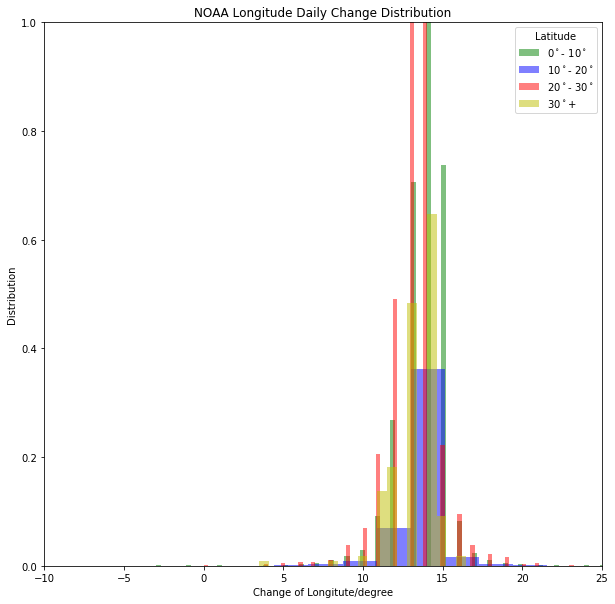

In [59]:
x1 = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']=='0-10', 'longitude_diff']
x2 = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']=='10-20', 'longitude_diff']
x3 = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']=='20-30', 'longitude_diff']
x4= noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']=='30+', 'longitude_diff']
# x5 = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']=='40-50', 'longitude_diff']



kwargs = dict(alpha=0.5, bins=100,stacked=True,density=True)

plt.figure(figsize=(10,10))

plt.hist(x1, **kwargs, color='g', label='0$^\circ$- 10$^\circ$')
plt.hist(x2, **kwargs, color='b', label='10$^\circ$- 20$^\circ$')
plt.hist(x3, **kwargs, color='r', label='20$^\circ$- 30$^\circ$')
plt.hist(x4, **kwargs, color='y', label='30$^\circ$+')
# plt.hist(x5, **kwargs, color='pink', label='40$^\circ$- 50$^\circ$')

plt.gca().set(title='NOAA Longitude Daily Change Distribution', ylabel='Distribution',xlabel='Change of Longitute/degree')
plt.xlim(-10,25)
plt.ylim(0,1)
plt.legend(title = 'Latitude');
# plt.savefig('NOAA_longitude_change.png', dpi=1200)

In [60]:
# # Plot
# fig, axes = plt.subplots(1, 4, figsize=(10,2.5), dpi=600, sharex=True, sharey=True)
# colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:olive']
# x_labels = ['0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+']

# for i, (ax, cut) in enumerate(zip(axes.flatten(), grouped_noaa_lat['lat_degree_label_'].unique())):
    
#     x = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']==cut, 'longitude_diff']
    
# #     pmf, bins = np.histogram(x,bins =[-10,0,10,20])
    
# #     pro = [round(elem/len(x.values),2) for i,elem in enumerate(pmf)]
    
# #     print(pro)
# #     sns.barplot(x = bins[:-1],y = pro,ax=ax)
# #     a = np.column_stack((bins[:-1], pmf))
# #     print(a)
# # np.histogram(np.arange(4), bins=np.arange(5), density=True)
# #     print(pmf,bins)
# #     print(max(x.values))
    
# #     b = int(round(len(x.values)/(max(x.values)-min(x.values)),0))

# #     print(b)
# #     sns.distplot(x.values,ax = ax,kde = False,norm_hist=True,fit=norm)        
# #     ax.hist(x, alpha=0.5, bins=bins[:-1], weights=counts,density = True,stacked=True,label=str(cut), color=colors[i])
# #     ax.plot(x,)

#     ax.set_xlabel(x_labels[i])
#     ax.set_ylabel('Distribution')
    
    
#     num_bins = 50
#     counts,bins = np.histogram(x,bins = num_bins)
#     bins =  bins[:-1] + (bins[1] - bins[0])/2
#     probs = counts/float(counts.sum())
    
#     ax.bar(bins, probs, 10/num_bins)

# plt.suptitle('Distribution Histogram of Longitute Change', y=1.05, size=16)
# ax.set_xlim(-10, 25)
# # ax.set_ylim(0,0.5)

# # ax.set_ylim(0, 1)
# plt.tight_layout();

In [61]:
# # Plot
# fig, axes = plt.subplots(1, 4, figsize=(10,3), dpi=600, sharex=True, sharey=True)
# colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:olive']
# # x_labels = ['0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+']

# for i, (ax, cut) in enumerate(zip(axes.flatten(), grouped_noaa_lat['lat_degree_label_'].unique())):
    
#     x = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']==cut, 'longitude_diff']
    
# #     pmf, bins = np.histogram(x,bins =[-10,0,10,20])
    
# #     pro = [round(elem/len(x.values),2) for i,elem in enumerate(pmf)]
    
# #     print(pro)
# #     sns.barplot(x = bins[:-1],y = pro,ax=ax)
# #     a = np.column_stack((bins[:-1], pmf))
# #     print(a)
# # np.histogram(np.arange(4), bins=np.arange(5), density=True)
# #     print(pmf,bins)
# #     print(max(x.values))
    
# #     b = int(round(len(x.values)/(max(x.values)-min(x.values)),0))

# #     print(b)
# #     sns.distplot(x.values,ax = ax,kde = False,norm_hist=True,fit=norm)        
# #     ax.hist(x, alpha=0.5, bins=bins[:-1], weights=counts,density = True,stacked=True,label=str(cut), color=colors[i])
# #     ax.plot(x,)

#     ax.set_title(cut)
    
    
#     num_bins = 50
#     counts,bins = np.histogram(x,bins = num_bins)
#     bins =  bins[:-1] + (bins[1] - bins[0])/2
#     probs = counts/float(counts.sum())
    
#     ax.bar(bins, probs, 10/num_bins)

# # plt.suptitle('Distribution Histogram of Longitute Change', y=1.05, size=16)
# ax.set_xlim(-10, 25)
# # ax.set_ylim(0,0.5)

# # ax.set_ylim(0, 1)
# plt.tight_layout();
# plt.title('Distribution Histogram of Latitude Change', y=1.05, size=10)
# # plt.savefig('NOAA_longitude_distribution.jpg', dpi=1200)

Text(0.5, 1.05, '       ')

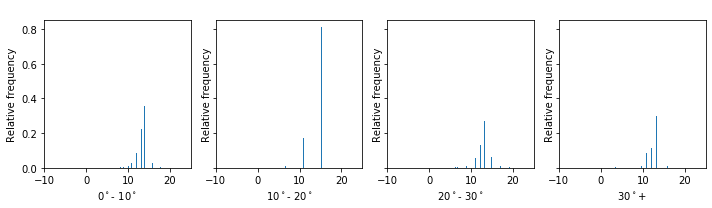

In [62]:
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True,tight_layout=True)
colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:olive']
x_labels = ['0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+']

for i in range(4):
    
    ax = axes[i]
    x = noaa_longitude_differ_df.loc[noaa_longitude_differ_df['lat_degree_label']==labels[i], 'longitude_diff']
    
#     pmf, bins = np.histogram(x,bins =[-10,0,10,20])
    
#     pro = [round(elem/len(x.values),2) for i,elem in enumerate(pmf)]
    
#     print(pro)
#     sns.barplot(x = bins[:-1],y = pro,ax=ax)
#     a = np.column_stack((bins[:-1], pmf))
#     print(a)
# np.histogram(np.arange(4), bins=np.arange(5), density=True)
#     print(pmf,bins)
#     print(max(x.values))
    
#     b = int(round(len(x.values)/(max(x.values)-min(x.values)),0))

#     print(b)
#     sns.distplot(x.values,ax = ax,kde = False,norm_hist=True,fit=norm)        
#     ax.hist(x, alpha=0.5, bins=bins[:-1], weights=counts,density = True,stacked=True,label=str(cut), color=colors[i])
#     ax.plot(x,)

    ax.set_xlabel(x_labels[i])
    ax.set_xlim(-10, 25)
    ax.set_ylabel('Relative frequency')
    
    num_bins = 50
    counts,bins = np.histogram(x,bins = num_bins)
    bins =  bins[:-1] + (bins[1] - bins[0])/2
    probs = counts/float(counts.sum())
    
    ax.bar(bins, probs, 10/num_bins)

# plt.suptitle('Distribution Histogram of Longitute Change', y=1.05, size=16)

# ax.set_ylim(0,0.5)

# ax.set_ylim(0, 1)
plt.tight_layout()
plt.title('       ', y=1.05, size=10)
# plt.savefig('NOAA_longitude_distribution_frequency.pdf', dpi=1200,bbox_inches='tight')

Text(-4.575000000000003, 0.5, 'Daily Change of Longitude /Degree')

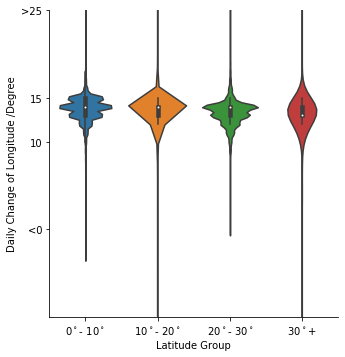

In [63]:
import seaborn as sns

# ax = plt.subplots(figsize=(15,15))


sns.catplot(x="lat_degree_label", y="longitude_diff", kind="violin",data=noaa_longitude_differ_df)
# plt.xlim(-10,25)
plt.ylim(-10,25)
y_positions = (0,10,15,25)
y_labels = ('<0','10','15','>25')
plt.yticks(y_positions, y_labels)

x_positions = (0,1,2,3)
x_labels = ('0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+')
plt.xticks(x_positions,x_labels)

# plt.title('Longitude of NOAA AR Daily Change Distribution')
plt.xlabel('Latitude Group')
plt.ylabel('Daily Change of Longitude /Degree')





# plt.figure(figsize=(10,10))

# sns.swarmplot(x="lat_degree_label", y="longitude_diff", color="k", size=3, data=noaa_longitude_differ_df, ax=g.ax);

# plt.savefig('NOAA_longitude_change_violin.png', dpi=1200)

In [61]:
# sns.violinplot(x="lat_degree_label", y="longitude_diff",data=noaa_longitude_differ_df)
# plt.ylim(-10,25)

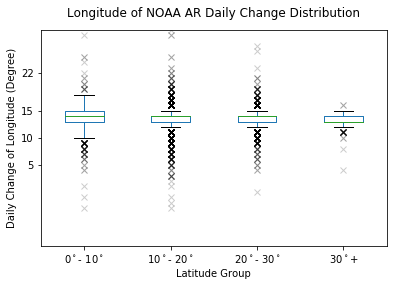

In [90]:
green_diamond = dict(markerfacecolor='b', marker='x',alpha = 0.2)
# sns.catplot(x="lat_degree_label", y="longitude_diff", kind="box", data=noaa_longitude_differ_df)


noaa_longitude_differ_df.boxplot(column=['longitude_diff'],by='lat_degree_label',flierprops = green_diamond,grid = False,figsize=(6,4) )
plt.ylim(-10,30)
y_positions = (5,10,15,22)
y_labels = ('5','10','15','22')
plt.yticks(y_positions, y_labels)

x_positions = (1,2,3,4)
x_labels = ('0$^\circ$- 10$^\circ$','10$^\circ$- 20$^\circ$','20$^\circ$- 30$^\circ$','30$^\circ$+')
plt.xticks(x_positions,x_labels)

# plt.title('Longitude of NOAA AR Daily Change Distribution')
plt.xlabel('Latitude Group')
plt.ylabel('Daily Change of Longitude (Degree)')
plt.title('')
plt.suptitle(' ')
plt.suptitle('Longitude of NOAA AR Daily Change Distribution')
plt.savefig('NOAA_longitude_change_box_bigger_B.pdf', dpi=1200,bbox_inches='tight')

Figure for NOAA AR 11490

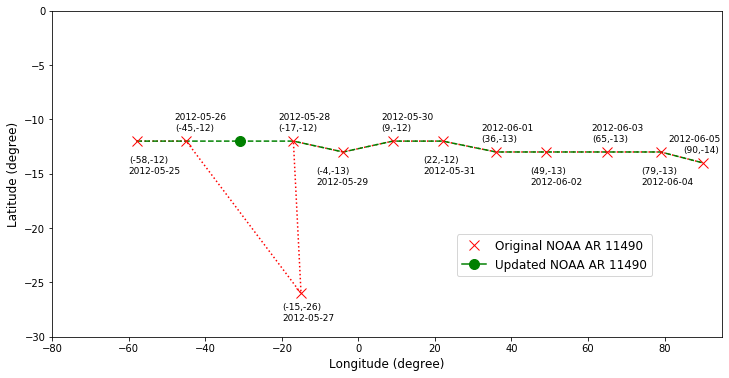

In [89]:
plt.figure(figsize=(12,6))
# plt.tight_layout()
x_11490_o = [-58,-45,-15,-17,-4,9,22,36,49,65,79,90]
y_11490_o = [-12,-12,-26,-12,-13,-12,-12,-13,-13,-13,-13,-14]
x_11490_n_n = [-58,-45,-31,-17,-4,9,22,36,49,65,79,90]
y_11490_n_n = [-12,-12,-12,-12,-13,-12,-12,-13,-13,-13,-13,-14]
x_11490_n = [-31]
y_11490_n = [-12]
plt.xlim(-80,95)
plt.ylim(-30,0)


p3 = plt.plot(x_11490_o,y_11490_o,'r:')
p4 = plt.plot(x_11490_n_n,y_11490_n_n,'g--')


p1 = plt.plot(x_11490_o,y_11490_o,'rx',markersize=10)
p2 = plt.plot(x_11490_n,y_11490_n,color='green',marker = 'o',markersize=10)

plt.text(-60,-14,'(-58,-12)',fontsize=9)
plt.text(-60,-15,'2012-05-25',fontsize=9)

plt.text(-48,-11,'(-45,-12)',fontsize=9)
plt.text(-48,-10,'2012-05-26',fontsize=9)

plt.text(-20,-27.5,'(-15,-26)',fontsize=9)
plt.text(-20,-28.5,'2012-05-27',fontsize=9)

plt.text(-21,-11,'(-17,-12)',fontsize=9)
plt.text(-21,-10,'2012-05-28',fontsize=9)

plt.text(-11,-15,'(-4,-13)',fontsize=9)
plt.text(-11,-16,'2012-05-29',fontsize=9)

plt.text(6,-11,'(9,-12)',fontsize=9)
plt.text(6,-10,'2012-05-30',fontsize=9)

plt.text(17,-14,'(22,-12)',fontsize=9)
plt.text(17,-15,'2012-05-31',fontsize=9)

plt.text(32,-12,'(36,-13)',fontsize=9)
plt.text(32,-11,'2012-06-01',fontsize=9)

plt.text(45,-15,'(49,-13)',fontsize=9)
plt.text(45,-16,'2012-06-02',fontsize=9)

plt.text(61,-12,'(65,-13)',fontsize=9)
plt.text(61,-11,'2012-06-03',fontsize=9)

plt.text(74,-15,'(79,-13)',fontsize=9)
plt.text(74,-16,'2012-06-04',fontsize=9)

plt.text(85,-13,'(90,-14)',fontsize=9)
plt.text(81,-12,'2012-06-05',fontsize=9)



plt.xlabel('Longitude (degree)',fontsize=12)
plt.ylabel('Latitude (degree)',fontsize=12)
plt.legend((p1[0], p2[0]), ('Original NOAA AR 11490', 'Updated NOAA AR 11490'),loc='center', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

plt.savefig('NOAA11490.pdf',dpi=600,bbox_inches='tight')
plt.show()

In [94]:
# plt.figure(figsize=(20,10))
# x_11939_o = [69,84]
# y_11939_o = [-6,-6]
# # x_11490_n_n = [-58,-45,-31,-17,-4,9,22,36,49,65,79,90]
# # y_11490_n_n = [-12,-12,-12,-12,-13,-12,-12,-13,-13,-13,-13,-14]
# # x_11490_n = [-31]
# # y_11490_n = [-12]
# plt.xlim(50,100)
# plt.ylim(-8,-4)
# x_11939_line = [61.5,69,76.5,84,91.5]
# y_11939_line = [-6,-6,-6,-6,-6]

# x_11939_point = [61.5,76.5,91.5]
# y_11939_point = [-6,-6,-6]
# p3 = plt.plot(x_11939_line,y_11939_line,'r:')
# p4 = plt.plot(x_11939_point,y_11939_point,"b|")


# p1 = plt.plot(x_11830_o,y_11830_o,'ro',markersize=10)
# # p2 = plt.plot(x_11490_n,y_11490_n,color='green',marker = 'o',markersize=10)

# plt.text(60,-6.2,'2013-12-29 12:00:00',fontsize=9)
# plt.text(67,-5.7,'2013-12-30 00:00:00',fontsize=9)
# plt.text(74,-6.2,'2013-12-30 12:00:00',fontsize=9)
# plt.text(82,-5.7,'2013-12-31 00:00:00',fontsize=9)
# plt.text(89,-6.2,'2013-12-31 12:00:00',fontsize=9)
# # plt.text(-60,-14,'2012-05-25',fontsize=9)

# # plt.text(-48,-11,'(-45,-12)',fontsize=9)
# # plt.text(-48,-10,'2012-05-26',fontsize=9)

# # plt.text(-20,-28,'(-15,-26)',fontsize=9)
# # plt.text(-20,-27,'2012-05-27',fontsize=9)

# # plt.text(-21,-11,'(-17,-12)',fontsize=9)
# # plt.text(-21,-10,'2012-05-28',fontsize=9)

# # plt.text(-11,-15,'(-4,-13)',fontsize=9)
# # plt.text(-11,-14,'2012-05-29',fontsize=9)

# # plt.text(6,-11,'(9,-12)',fontsize=9)
# # plt.text(6,-10,'2012-05-30',fontsize=9)

# # plt.text(17,-14,'(22,-12)',fontsize=9)
# # plt.text(17,-13,'2012-05-31',fontsize=9)

# # plt.text(32,-12,'(36,-13)',fontsize=9)
# # plt.text(32,-11,'2012-06-01',fontsize=9)

# # plt.text(45,-15,'(49,-13)',fontsize=9)
# # plt.text(45,-14,'2012-06-02',fontsize=9)

# # plt.text(61,-12,'(65,-13)',fontsize=9)
# # plt.text(61,-11,'2012-06-03',fontsize=9)

# # plt.text(74,-14,'(79,-13)',fontsize=9)
# # plt.text(74,-15,'2012-06-04',fontsize=9)

# # plt.text(85,-13,'(90,-14)',fontsize=9)
# # plt.text(85,-12,'2012-06-05',fontsize=9)



# plt.xlabel('Longitude/degree',fontsize=12)
# plt.ylabel('Latitude/degree',fontsize=12)
# plt.legend((p1[0], p2[0]), ('Original NOAA AR 11490', 'Updated NOAA AR 11490'),loc='center', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

# # plt.savefig('NOAA_11939.pdf',dpi=1200)
# plt.show()

In [93]:
# plt.figure(figsize=(20,10))
# # plt.tight_layout()
# x_11522_o = [21,36,49,62,76,90]
# y_11522_o = [13,13,13,13,11,12]
# x_11490_n_n = [-58,-45,-31,-17,-4,9,22,36,49,65,79,90]
# y_11490_n_n = [-12,-12,-12,-12,-13,-12,-12,-13,-13,-13,-13,-14]
# x_11490_n = [-31]
# y_11490_n = [-12]
# plt.xlim(10,100)
# plt.ylim(0,90)


# # p3 = plt.plot(x_11490_o,y_11490_o,'r:')
# # p4 = plt.plot(x_11490_n_n,y_11490_n_n,'g--')


# p1 = plt.plot(x_11522_o,y_11522_o,'rx',markersize=10)
# # p2 = plt.plot(x_11490_n,y_11490_n,color='green',marker = 'o',markersize=10)

# # plt.text(-60,-13,'(-58,-12)',fontsize=9)
# # plt.text(-60,-14,'2012-05-25',fontsize=9)

# # plt.text(-48,-11,'(-45,-12)',fontsize=9)
# # plt.text(-48,-10,'2012-05-26',fontsize=9)

# # plt.text(-20,-28,'(-15,-26)',fontsize=9)
# # plt.text(-20,-27,'2012-05-27',fontsize=9)

# # plt.text(-21,-11,'(-17,-12)',fontsize=9)
# # plt.text(-21,-10,'2012-05-28',fontsize=9)

# # plt.text(-11,-15,'(-4,-13)',fontsize=9)
# # plt.text(-11,-14,'2012-05-29',fontsize=9)

# # plt.text(6,-11,'(9,-12)',fontsize=9)
# # plt.text(6,-10,'2012-05-30',fontsize=9)

# # plt.text(17,-14,'(22,-12)',fontsize=9)
# # plt.text(17,-13,'2012-05-31',fontsize=9)

# # plt.text(32,-12,'(36,-13)',fontsize=9)
# # plt.text(32,-11,'2012-06-01',fontsize=9)

# # plt.text(45,-15,'(49,-13)',fontsize=9)
# # plt.text(45,-14,'2012-06-02',fontsize=9)

# # plt.text(61,-12,'(65,-13)',fontsize=9)
# # plt.text(61,-11,'2012-06-03',fontsize=9)

# # plt.text(74,-14,'(79,-13)',fontsize=9)
# # plt.text(74,-15,'2012-06-04',fontsize=9)

# # plt.text(85,-13,'(90,-14)',fontsize=9)
# # plt.text(85,-12,'2012-06-05',fontsize=9)



# plt.xlabel('Longitude/degree',fontsize=12)
# plt.ylabel('Latitude/degree',fontsize=12)
# # plt.legend((p1[0], p2[0]), ('Original NOAA AR 11490', 'Updated NOAA AR 11490'),loc='center', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

# # plt.savefig('NOAA_11490.pdf',dpi=600,bbox_inches='tight')
# plt.show()

In [92]:
# plt.figure(figsize=(20,10))
# # plt.tight_layout()
# x_11468_o = [-12,2,17,30,42,55,69,83]
# y_11468_o = [9,11,8,9,10,11,11,11]
# # x_11490_n_n = [-58,-45,-31,-17,-4,9,22,36,49,65,79,90]
# # y_11490_n_n = [-12,-12,-12,-12,-13,-12,-12,-13,-13,-13,-13,-14]
# # x_11490_n = [-31]
# # y_11490_n = [-12]
# x_harp_1633 = [78.35,78.55,77.5,81.2]
# y_harp_1633 = [10.05,10.1,10,9.5]
# plt.xlim(-15,100)
# plt.ylim(0,20)


# # p3 = plt.plot(x_11490_o,y_11490_o,'r:')
# # p4 = plt.plot(x_11490_n_n,y_11490_n_n,'g--')


# p1 = plt.plot(x_11468_o,y_11468_o,color='r', marker = '.',markersize=9,linestyle='dashed')
# p2 = plt.plot(x_harp_1633,y_harp_1633,color='b',marker = "s",markersize=40,linestyle='dashed',alpha=.5)

# # plt.text(-60,-13,'(-58,-12)',fontsize=9)
# # plt.text(-60,-14,'2012-05-25',fontsize=9)

# # plt.text(-48,-11,'(-45,-12)',fontsize=9)
# # plt.text(-48,-10,'2012-05-26',fontsize=9)

# # plt.text(-20,-28,'(-15,-26)',fontsize=9)
# # plt.text(-20,-27,'2012-05-27',fontsize=9)

# # plt.text(-21,-11,'(-17,-12)',fontsize=9)
# # plt.text(-21,-10,'2012-05-28',fontsize=9)

# # plt.text(-11,-15,'(-4,-13)',fontsize=9)
# # plt.text(-11,-14,'2012-05-29',fontsize=9)

# # plt.text(6,-11,'(9,-12)',fontsize=9)
# # plt.text(6,-10,'2012-05-30',fontsize=9)

# # plt.text(17,-14,'(22,-12)',fontsize=9)
# # plt.text(17,-13,'2012-05-31',fontsize=9)

# # plt.text(32,-12,'(36,-13)',fontsize=9)
# # plt.text(32,-11,'2012-06-01',fontsize=9)

# # plt.text(45,-15,'(49,-13)',fontsize=9)
# # plt.text(45,-14,'2012-06-02',fontsize=9)

# # plt.text(61,-12,'(65,-13)',fontsize=9)
# # plt.text(61,-11,'2012-06-03',fontsize=9)

# # plt.text(74,-14,'(79,-13)',fontsize=9)
# # plt.text(74,-15,'2012-06-04',fontsize=9)

# # plt.text(85,-13,'(90,-14)',fontsize=9)
# # plt.text(85,-12,'2012-06-05',fontsize=9)



# plt.xlabel('Longitude/degree',fontsize=12)
# plt.ylabel('Latitude/degree',fontsize=12)
# # plt.legend((p1[0], p2[0]), ('Original NOAA AR 11490', 'Updated NOAA AR 11490'),loc='center', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

# # plt.savefig('NOAA_11490.pdf',dpi=600,bbox_inches='tight')
# plt.show()